In [2]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from scipy.ndimage import gaussian_filter


import sys
sys.path.append('/Users/kperks/Documents/ell-connectome/efish_em/efish_em')

# from eCREST_cli_beta import ecrest, import_settings
from eCREST_cli import ecrest
import AnalysisCode as efish 

## Plotting style settings

In [3]:
filepath = Path('/Users/kperks/Documents/ell-connectome/efish_em')
filename = 'efish_em.mplstyle'
plt.style.use(filepath/filename)

In [4]:
cell_colors = efish.color_palette('cell')
structure_colors = efish.color_palette('structure')

# simulate traces and plot

In [43]:
# Parameters
dt = 1e-3
t_before = 0.01
length_sim = 160
length_sim_s = length_sim * dt
v_eq = 1

Amp = 1
alp = 125
nr_patting_before = int(t_before / dt + 0.015 / dt)
nr_patting_after = int(0.06 / dt)
nr_patting = nr_patting_before + nr_patting_after

t = np.arange(0, length_sim_s - (nr_patting + 1) * dt, dt)
period = length_sim_s - (nr_patting + 1) * dt
omega = 2 * np.pi / period
stim = Amp * np.exp(-alp * t) * np.sin(omega * t)
# stim = np.concatenate([np.zeros(nr_patting_before), stim, np.zeros(nr_patting_after)])

# v_stim_mult = 2.5
# w_stim = abs(v_stim_mult / np.max(stim))

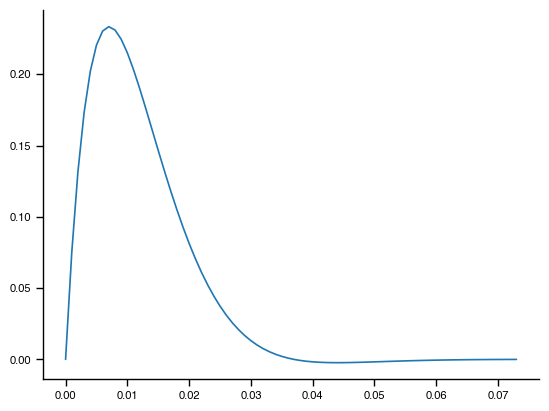

In [44]:
plt.plot(t,stim)

In [ ]:
# %%
# Prey stimulus
nr_eods = 3
length_stim_plot = 75
amp_prey = 1
stim_rep = np.tile(stim[:length_stim_plot], nr_eods)

omega_prey_plot = 2 * np.pi * 50
t_prey_plot = np.roll(np.arange(0, nr_eods * dt * length_stim_plot, dt), np.random.randint(len(stim_rep)))
amp_prey_plot = np.random.rand(len(t_prey_plot))


seed = 42#2#42
rng = np.random.default_rng(seed)  # creates a reproducible generator
prey = gaussian_filter(amp_prey_plot * (amp_prey * rng.standard_normal(len(stim_rep))), sigma=5/3) # matlab version: prey = smoothdata(amp_prey_plot.*(amp_prey*randn(1,length(stim_rep))),'gaussian',5);
#more oscillatory version of prey: prey = amp_prey_plot * (amp_prey * np.sin(omega_prey_plot * t_prey_plot + np.random.rand() * 2 * np.pi))

prey_plot = np.zeros(len(prey))
idx_plot = np.arange(int(1.15 * length_stim_plot), int(2 * length_stim_plot))
prey_plot[idx_plot] = prey[idx_plot]

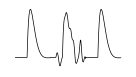

In [12]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(2*(prey_plot + w_stim * stim_rep),color = 'black',linewidth=0.5)
ax.set_ylim(-1,5)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)

# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/EAF_input.svg')

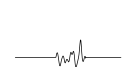

In [11]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(2*prey_plot,color = 'black',linewidth=0.5)
ax.set_ylim(-1,5)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/ON_output.svg')

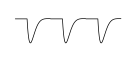

In [14]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(-w_stim * stim_rep,color = 'black',linewidth=0.5)
ax.set_ylim(-5,1)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/ON_negimage.svg')

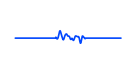

In [65]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(-prey_plot,color = cell_colors['lg'])
ax.set_ylim(-3,3)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/OFF_output.svg')

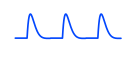

In [67]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(w_stim * stim_rep,color = cell_colors['lg'])
ax.set_ylim(-3,3)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/OFF_negimage.svg')

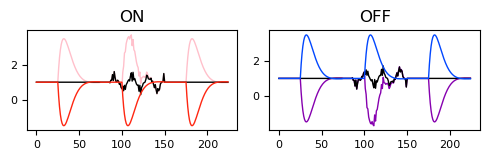

In [4]:
# %%
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(5, 1.7), dpi=100)

# ON subplot
axs[0].plot(prey_plot + v_eq + w_stim * stim_rep, linewidth=1, color=aff_color)
axs[0].plot(prey_plot + v_eq, linewidth=lw, color='k')
axs[0].plot(-w_stim * stim_rep + v_eq, linewidth=lw, color=ON_color)
axs[0].set_title('ON')
axs[0].set_facecolor('none')
axs[0].tick_params(labelsize=8)
# axs[0].box(False)

# OFF subplot
axs[1].plot(-prey_plot + v_eq - w_stim * stim_rep, linewidth=1, color=sp_color)
axs[1].plot(-prey_plot + v_eq, linewidth=lw, color='k')
axs[1].plot(w_stim * stim_rep + v_eq, linewidth=lw, color=OFF_color)
axs[1].set_title('OFF')
axs[1].set_facecolor('none')
axs[1].tick_params(labelsize=8)
# axs[1].box(False)

plt.tight_layout()

# %%
# Optional saving
save_figure = False
if save_figure:
    from pathlib import Path
    pth_save_figure = Path.home() / "Google Drive/My Drive/Why_figures/post_EM/sketch.pdf"
    fig.savefig(pth_save_figure, bbox_inches='tight')

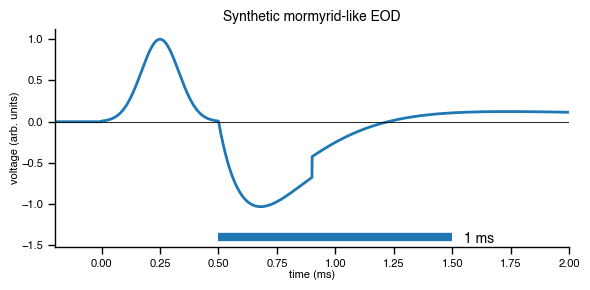

In [15]:

def H(x): 
    return (x >= 0).astype(float)

def V(t):
    # Parameters (ms, arb. units)
    A_p, t_p, sigma_p = 1.0, 0.25, 0.08
    A_n, t_n, tau_n = 2.8, 0.50, 0.18
    A_l, t_l, tau_l = 0.25, 0.90, 1.5
    v = A_p * np.exp(-((t - t_p)**2) / (2*sigma_p**2)) * H(t)
    # skewed causal trough (normalized by tau to get proper units/shape)
    trough = A_n * ((t - t_n)/tau_n) * np.exp(-(t - t_n)/tau_n) * H(t - t_n)
    tail = A_l * np.exp(-(t - t_l)/tau_l) * H(t - t_l)
    return v - trough + tail

# Time vector: show -0.2 ms .. 4 ms to include baseline
t = np.linspace(-0.2, 4.0, 4000)
y = V(t)

plt.figure(figsize=(6,3))
plt.plot(t, y, lw=2)
plt.axhline(0, color='k', linewidth=0.6)
plt.xlabel('time (ms)')
plt.ylabel('voltage (arb. units)')
plt.xlim(-0.2, 2.0)
plt.title('Synthetic mormyrid-like EOD')
# add scale bar similar to your image (1 ms)
plt.hlines(-1.4, 0.5, 1.5, linewidth=6)   # place a thick scale bar
plt.text(1.55, -1.42, '1 ms', va='center')
plt.tight_layout()
plt.show()


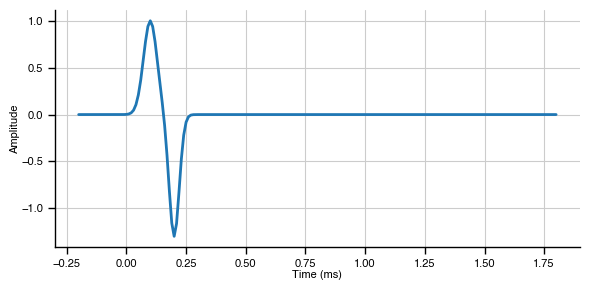

In [16]:

# Time vector (ms)
t = np.linspace(-0.2, 1.8, 201)   # dt = 0.01 ms

# Biphasic waveform
wave = (
    np.exp(-((t - 0.10) / 0.04)**2)                      # positive lobe
    - 1.3 * np.exp(-((t - 0.20) / 0.03)**2)              # negative lobe
)

# Normalize to max amplitude
wave = wave / np.max(wave)

# Plot
plt.figure(figsize=(6,3))
plt.plot(t, wave, linewidth=2)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


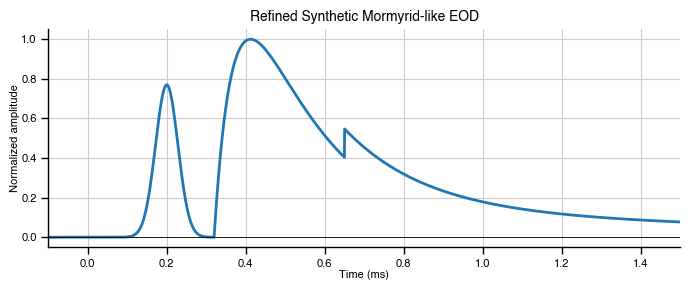

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
#  Realistic mormyrid-like EOD waveform model
# -----------------------------------------------------------

def mormyrid_eod(t):
    """
    Synthetic EOD with realistic mormyrid shape:
        - small fast positive head
        - sharp deep negative trough
        - slower return to baseline
    """

    # --- Positive head (narrow Gaussian) ---
    A_pos     = 0.8
    t_pos     = 0.20   # ms
    sigma_pos = 0.04

    pos = A_pos * np.exp(-((t - t_pos) / sigma_pos)**2)

    # --- Negative peak (skewed, causal) ---
    A_neg  = 2.2        # amplitude
    t_neg  = 0.32       # onset of negative phase
    tau_r  = 0.05       # fast rise
    tau_d  = 0.20       # slower decay

    # bi-exponential gives good asymmetry:
    neg = -A_neg * (np.exp(-(t - t_neg)/tau_r) - np.exp(-(t - t_neg)/tau_d))
    neg *= (t >= t_neg)  # causal: zero before onset

    # --- Slow tail (post-wave) ---
    A_tail = 0.15
    t_tail = 0.65
    tau_tail = 1.2

    tail = A_tail * np.exp(-(t - t_tail)/tau_tail)
    tail *= (t >= t_tail)

    # Combine components
    v = pos + neg + tail

    # Normalize to peak = 1
    v /= np.max(np.abs(v))

    return v


# -----------------------------------------------------------
#  Generate and plot
# -----------------------------------------------------------
t = np.linspace(-0.2, 2.0, 4000)  # high resolution

wave = mormyrid_eod(t)

plt.figure(figsize=(7,3))
plt.plot(t, wave, linewidth=2)
plt.axhline(0, color='k', linewidth=0.6)
plt.xlabel("Time (ms)")
plt.ylabel("Normalized amplitude")
plt.xlim(-0.1, 1.5)
plt.grid(True)
plt.title("Refined Synthetic Mormyrid-like EOD")
plt.tight_layout()
plt.show()


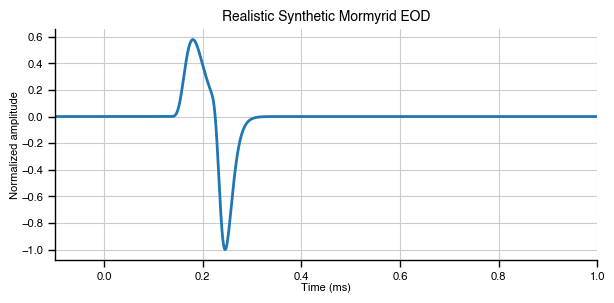

In [18]:


def lognorm(t, t0, tau, sigma):
    x = (t - t0) / tau
    x = np.clip(x, 1e-9, None)
    return np.exp(- (np.log(x)**2) / (2 * sigma**2))

t = np.linspace(-0.2, 1.5, 5000)

# Positive head
A_pos = 1.0
pos = A_pos * lognorm(t, t0=0.12, tau=0.06, sigma=0.32)

# Negative trough
A_neg = 1.8
neg = A_neg * lognorm(t, t0=0.20, tau=0.045, sigma=0.28)

# Biphasic waveform
wave = pos - neg

# Normalize
wave /= np.max(np.abs(wave))

plt.figure(figsize=(7,3))
plt.plot(t, wave, linewidth=2)
plt.xlabel("Time (ms)")
plt.ylabel("Normalized amplitude")
plt.xlim(-0.1, 1.0)
plt.grid(True)
plt.title("Realistic Synthetic Mormyrid EOD")
plt.show()


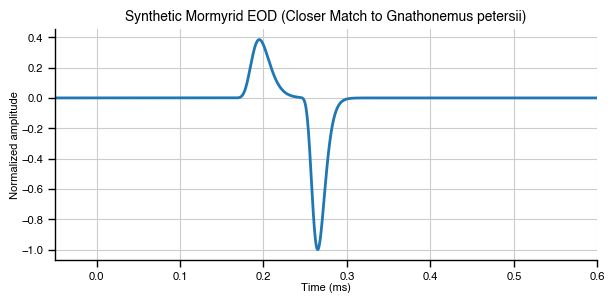

In [19]:

def lognorm(t, t0, tau, sigma):
    x = (t - t0) / tau
    x = np.clip(x, 1e-9, None)
    return np.exp(- (np.log(x)**2) / (2 * sigma**2))

t = np.linspace(-0.1, 1.0, 6000)

# --- Tuned parameters to match the uploaded waveform more closely ---

# Sharper and earlier positive peak
A_pos = 1.0
pos = A_pos * lognorm(t, t0=0.15, tau=0.045, sigma=0.24)

# Deeper, slightly later, and narrower negative trough
A_neg = 2.6
neg = A_neg * lognorm(t, t0=0.23, tau=0.035, sigma=0.22)

# Biphasic waveform
wave = pos - neg

# Normalize
wave /= np.max(np.abs(wave))

plt.figure(figsize=(7,3))
plt.plot(t, wave, linewidth=2)
plt.xlabel("Time (ms)")
plt.ylabel("Normalized amplitude")
plt.xlim(-0.05, 0.6)
plt.grid(True)
plt.title("Synthetic Mormyrid EOD (Closer Match to Gnathonemus petersii)")
plt.show()


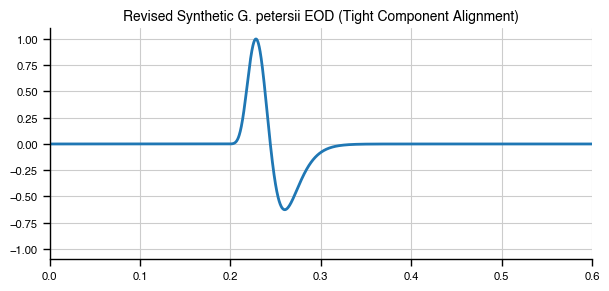

In [6]:

def lognorm(t, t0, tau, sigma):
    x = (t - t0) / tau
    x = np.clip(x, 1e-9, None)
    return np.exp(- (np.log(x)**2) / (2 * sigma**2))

t = np.linspace(-0.2, 1.2, 6000)

# --- New parameters: much tighter temporal overlap ---

# Positive peak: sharp and narrow
A_pos = 1.6 #1.0
pos = A_pos * lognorm(t, t0=0.18, tau=0.050, sigma=0.23)

# Negative trough: begins on the *same falling slope* as pos
A_neg = 1.2 #2.9
neg = A_neg * lognorm(t, t0=0.20, tau=0.055, sigma=0.28)

wave = pos - neg
wave /= np.max(np.abs(wave))

plt.figure(figsize=(7,3))
plt.plot(t, wave, linewidth=2)
plt.xlim(0.0, 0.6)
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.title("Revised Synthetic G. petersii EOD (Tight Component Alignment)")
plt.show()


In [7]:
# Biphasic EOD waveform

def lognorm(t, t0, tau, sigma):
    x = (t - t0) / tau
    x = np.clip(x, 1e-9, None)
    return np.exp(-(np.log(x)**2) / (2 * sigma**2))

In [34]:
dt = 1e-3
dur_plot = 0.3
t_eod = np.linspace(0, dur_plot, int(dur_plot/dt))

A_pos = 1.6
pos = A_pos * lognorm(t_eod, t0=0.05, tau=0.050, sigma = 0.5)#sigma=0.23)

A_neg = 1.5
neg = A_neg * lognorm(t_eod, t0=0.07, tau=0.055, sigma = 0.5)#, sigma=0.28)

wave = pos - neg
wave /= np.max(np.abs(wave))  # normalized biphasic EOD

# scaling factor (kept from original)
v_stim_mult = 2.5
w_stim = abs(v_stim_mult / np.max(wave))

# plt.plot(t_eod,w_stim * wave)


In [ ]:
# Prey modulation parameters
t_prey_plot = np.roll(np.arange(0,  dur_plot, dt),
                      np.random.randint(len(wave)))
amp_prey_plot = np.random.rand(len(t_prey_plot))

seed = 42
rng = np.random.default_rng(seed)

prey = gaussian_filter(
    amp_prey_plot * rng.standard_normal(len(wave)),
    sigma=5/3
)

# prey is only active between these indices
prey_plot = np.zeros(len(prey))
idx_plot = np.arange(int(0.08/dt),
                     int(0.25/dt))
prey_plot[idx_plot] = prey[idx_plot]

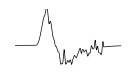

In [26]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(2*(prey_plot + (w_stim * wave)),color = 'black',linewidth=0.5)
ax.set_ylim(-3,5)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)

# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/EAF_input_biphas.svg')

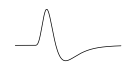

In [29]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(2*((w_stim * wave)),color = 'black',linewidth=0.5)
ax.set_ylim(-3,5)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)

# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/EOD_input_biphas.svg')

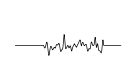

In [27]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(2*prey_plot,color = 'black',linewidth=0.5)
ax.set_ylim(-3,5)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/ON_output_biphas.svg')

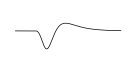

In [28]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(-w_stim * wave,color = 'black',linewidth=0.5)
ax.set_ylim(-5,3)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/ON_negimage_biphas.svg')

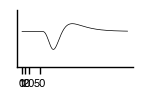

In [33]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(-w_stim * wave,color = 'black',linewidth=0.5)
ax.set_ylim(-5,3)
ax.set_xticks([0,10,20,50])
ax.set_yticks([])
# ax.set_yticklabels([])
# ax.tick_params(axis='both', which='major', length=0)
# sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/ON_biphas_axis.svg')